
# Tidyverse & ggplot2 - ICD Bootcamp
## Syed Murtuza Baker



In [2]:
format(Sys.time(), '%d %B, %Y')

[1] "06 December, 2020"

# Tidyverse
tidyverse.org defines Tidyverse as

> The tidyverse is an opinionated collection of R packages designed for data science. All packages share an underlying design philosophy, grammar, and data structures.

In [38]:
## Setting to display 10 rows and 10 columns
options(repr.matrix.max.rows=10, repr.matrix.max.cols=10)

In [39]:
library(tidyverse)
library(dplyr)
library(scater)

We will use single-cell RNA sequencing on 6826 stem cells from Chronic myelomonocytic leukaemia (CMML) patients and healthy controls using the droplet-based, ultra-high-throughput 10x platform. We found substantial inter and intra-patient heterogeneity, with CMML stem cells displaying distinctive transcriptional programs. Compared with normal controls, CMML stem cells exhibited transcriptomes characterized by increased expression of myeloid-lineage and cell cycle genes, and lower expression of genes selectively expressed by normal haematopoietic stem cells. 

In [40]:
sce <- readRDS('sce.rds')
sce

class: SingleCellExperiment 
dim: 12695 6826 
metadata(0):
assays(3): counts logcounts norm_exprs
rownames(12695): FO538757.2 AP006222.2 ... AC004556.1 AC240274.1
rowData names(12): id symbol ... total_counts log10_total_counts
colnames(6826): AAACCTGCACCGATAT-1 AAACGGGCACGACTCG-1 ...
  TTTGGTTTCATCTGCC-11 TTTGTCAGTAGGAGTC-11
colData names(59): barcode Sample ... sizeFactor cellType
reducedDimNames(1): tSNE
altExpNames(0):

## Tibble
- Tibbles are data-frames
- `tibble()` does much less: it never changes the type of the inputs (e.g. it never converts strings to factors!)
- it never changes the names of variables, and it never creates row names.
- tibble can have column names that are not valid R variable names, aka *non-syntactic* names.

In [41]:
tb <- tibble(
  `:)` = "smile", 
  ` ` = "space",
  `2000` = "number"
)
tb

:),,2000
<chr>,<chr>,<chr>
smile,space,number


## Pipe `%>%`
Pipe `%>%` passes the output from one stage to the other.

In [42]:
tbl_df(colData(sce))

barcode,Sample,total_features,log10_total_features,pct_counts_top_50_features,⋯,CellCycle,Cluster,Phase,sizeFactor,cellType
<fct>,<chr>,<int>,<dbl>,<dbl>,⋯,<chr>,<fct>,<fct>,<dbl>,<chr>
AAACCTGCACCGATAT-1,BC543,2152,3.333044,47.58468,⋯,G1,2,S,0.9487532,HSC
AAACGGGCACGACTCG-1,BC543,2078,3.317854,46.25919,⋯,G1,2,G1,0.9866038,HSC
AAAGCAATCCTAAGTG-1,BC543,2493,3.396896,49.27632,⋯,G1,2,G1,1.2639782,HSC
AAAGTAGGTGATGATA-1,BC543,2298,3.361539,43.84055,⋯,G1,2,G2M,1.0392552,HSC
AAAGTAGTCTCGCTTG-1,BC543,2343,3.369958,48.50873,⋯,G1,2,G1,0.9423322,HSC
⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮
TTTGCGCTCTCCAGGG-11,BC416,3254,3.512551,38.09099,⋯,G1,9,S,1.3593675,MEP
TTTGGTTCAGGGATTG-11,BC416,2274,3.356981,45.74316,⋯,G1,12,G1,0.8078496,HSC
TTTGGTTTCAACGAAA-11,BC416,3282,3.516271,38.71172,⋯,G1,12,S,1.3628816,HSC


In [43]:
names(colData(sce))

[1] "barcode"                                       
 [2] "Sample"                                        
 [3] "total_features"                                
 [4] "log10_total_features"                          
 [5] "pct_counts_top_50_features"                    
 [6] "pct_counts_top_100_features"                   
 [7] "pct_counts_top_200_features"                   
 [8] "pct_counts_top_500_features"                   
 [9] "total_features_endogenous"                     
[10] "log10_total_features_endogenous"               
[11] "pct_counts_top_50_features_endogenous"         
[12] "pct_counts_top_100_features_endogenous"        
[13] "pct_counts_top_200_features_endogenous"        
[14] "pct_counts_top_500_features_endogenous"        
[15] "total_features_feature_control"                
[16] "log10_total_features_feature_control"          
[17] "total_features_Mt"                             
[18] "log10_total_features_Mt"                       
[19] "is_cell_control"                               
[20] "total_features_by_counts"                      
[21] "log10_total_features_by_counts"                
[22] "total_counts"                                  
[23] "log10_total_counts"                            
[24] "pct_counts_in_top_50_features"                 
[25] "pct_counts_in_top_100_features"                
[26] "pct_counts_in_top_200_features"                
[27] "pct_counts_in_top_500_features"                
[28] "total_features_by_counts_endogenous"           
[29] "log10_total_features_by_counts_endogenous"     
[30] "total_counts_endogenous"                       
[31] "log10_total_counts_endogenous"                 
[32] "pct_counts_endogenous"                         
[33] "pct_counts_in_top_50_features_endogenous"      
[34] "pct_counts_in_top_100_features_endogenous"     
[35] "pct_counts_in_top_200_features_endogenous"     
[36] "pct_counts_in_top_500_features_endogenous"     
[37] "total_features_by_counts_feature_control"      
[38] "log10_total_features_by_counts_feature_control"
[39] "total_counts_feature_control"                  
[40] "log10_total_counts_feature_control"            
[41] "pct_counts_feature_control"                    
[42] "pct_counts_in_top_50_features_feature_control" 
[43] "pct_counts_in_top_100_features_feature_control"
[44] "pct_counts_in_top_200_features_feature_control"
[45] "pct_counts_in_top_500_features_feature_control"
[46] "total_features_by_counts_Mt"                   
[47] "log10_total_features_by_counts_Mt"             
[48] "total_counts_Mt"                               
[49] "log10_total_counts_Mt"                         
[50] "pct_counts_Mt"                                 
[51] "pct_counts_in_top_50_features_Mt"              
[52] "pct_counts_in_top_100_features_Mt"             
[53] "pct_counts_in_top_200_features_Mt"             
[54] "pct_counts_in_top_500_features_Mt"             
[55] "CellCycle"                                     
[56] "Cluster"                                       
[57] "Phase"                                         
[58] "sizeFactor"                                    
[59] "cellType"

In [44]:
tbl_df(colData(sce)) %>%
  group_by(Sample) %>%
  summarise(
    total.features = mean(total_features),
    total.counts = mean(total_counts)
  )

`summarise()` ungrouping output (override with `.groups` argument)



Sample,total.features,total.counts
<chr>,<dbl>,<dbl>
BC278,2971.597,18434.975
BC416,2070.396,9094.933
BC543,1947.178,10966.411
BC572,1471.253,5862.217
BC746,2565.624,13558.324
BC776,2330.206,10740.006
BC786,2507.971,12530.953
HV1,2263.642,10735.622
HV2,2408.250,12868.908


## `dplyr` - Functions as verbs.

__The most useful__

- `select()`: select columns
- `mutate()`: create new variables, change existing
- `filter()`: subset your data by some criterion
- `summarize()`: summarize your data in some way
- `group_by()`: group your data by a variable
- `slice()`: grab specific rows
- `select()`: select an observation

__Some others__

- `count()`: count your data
- `arrange()`: arrange your data by a column or variable
- `distinct()`: gather all distinct values of a variable
- `n_distinct()`: count how many distinct values you have (only works with summarize)
- `n()`: count how many observation you have for a subgroup
- `sample_n()`: Grab an N sample of your data
- `ungroup()`: ungroup grouped data by a variable
- `top_n(`): get the top N number of entries from a data frame

__To make it easier we copy the metadata for our `SingleCellExperiment` object `sce` to `d` __

In [45]:
d <- tbl_df(colData(sce))

### `Select` : To select collumns

In [46]:
select(d, Sample, Cluster, cellType)

Sample,Cluster,cellType
<chr>,<fct>,<chr>
BC543,2,HSC
BC543,2,HSC
BC543,2,HSC
BC543,2,HSC
BC543,2,HSC
⋮,⋮,⋮
BC416,9,MEP
BC416,12,HSC
BC416,12,HSC


In [47]:
d %>% 
  select(Sample, Cluster, cellType)

Sample,Cluster,cellType
<chr>,<fct>,<chr>
BC543,2,HSC
BC543,2,HSC
BC543,2,HSC
BC543,2,HSC
BC543,2,HSC
⋮,⋮,⋮
BC416,9,MEP
BC416,12,HSC
BC416,12,HSC


### `Filter` : To select rows

In [48]:
d %>% 
  filter(cellType == "HSC")

barcode,Sample,total_features,log10_total_features,pct_counts_top_50_features,⋯,CellCycle,Cluster,Phase,sizeFactor,cellType
<fct>,<chr>,<int>,<dbl>,<dbl>,⋯,<chr>,<fct>,<fct>,<dbl>,<chr>
AAACCTGCACCGATAT-1,BC543,2152,3.333044,47.58468,⋯,G1,2,S,0.9487532,HSC
AAACGGGCACGACTCG-1,BC543,2078,3.317854,46.25919,⋯,G1,2,G1,0.9866038,HSC
AAAGCAATCCTAAGTG-1,BC543,2493,3.396896,49.27632,⋯,G1,2,G1,1.2639782,HSC
AAAGTAGGTGATGATA-1,BC543,2298,3.361539,43.84055,⋯,G1,2,G2M,1.0392552,HSC
AAAGTAGTCTCGCTTG-1,BC543,2343,3.369958,48.50873,⋯,G1,2,G1,0.9423322,HSC
⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮
TTTGCGCCACAGACTT-11,BC416,1697,3.229938,43.98691,⋯,G1,12,G2M,0.5495411,HSC
TTTGGTTCAGGGATTG-11,BC416,2274,3.356981,45.74316,⋯,G1,12,G1,0.8078496,HSC
TTTGGTTTCAACGAAA-11,BC416,3282,3.516271,38.71172,⋯,G1,12,S,1.3628816,HSC


In [49]:
d %>% 
  select(barcode, Sample, total_features, cellType, Cluster) %>%
  filter(Sample == "BC572")


barcode,Sample,total_features,cellType,Cluster
<fct>,<chr>,<int>,<chr>,<fct>
AAACCTGTCCAAGTAC-2,BC572,1258,HSC,7
AAAGATGGTTGTCGCG-2,BC572,1436,HSC,7
AAAGCAATCACCGTAA-2,BC572,1074,HSC,7
AAATGCCTCGGTTCGG-2,BC572,917,HSC,7
AACTCAGGTCTTCGTC-2,BC572,1090,HSC,7
⋮,⋮,⋮,⋮,⋮
TTGACTTGTCAATGTC-7,BC572,1842,HSC,11
TTGCCGTTCCTGCCAT-7,BC572,942,HSC,7
TTGGCAACACTTCGAA-7,BC572,952,HSC,7


In [50]:
d %>% 
  filter(cellType == "Erythrocytes", pct_counts_Mt > 1.5) %>% 
  select(barcode, Sample, pct_counts_Mt, cellType, Cluster)

barcode,Sample,pct_counts_Mt,cellType,Cluster
<fct>,<chr>,<dbl>,<chr>,<fct>
AAGGAGCAGTTAGGTA-1,BC543,4.455730,Erythrocytes,17
AGTGGGATCATGTAGC-3,BC746,2.919859,Erythrocytes,9
GAACATCAGCCGATTT-3,BC746,4.329392,Erythrocytes,17
GATCAGTTCCTCATTA-3,BC746,4.152797,Erythrocytes,17
CCATGTCAGTCCAGGA-6,HV3,4.567626,Erythrocytes,17
⋮,⋮,⋮,⋮,⋮
GTGCTTCCACTTCTGC-11,BC416,4.018768,Erythrocytes,17
TCAGCTCGTCTAGTGT-11,BC416,2.483643,Erythrocytes,9
TCAGCTCTCTGCAGTA-11,BC416,2.826822,Erythrocytes,17


### `Mutate`: 
To create new variables in the data table:

In [51]:
d_exp <- d
d_exp <- cbind(d_exp, t(logcounts(sce)[c('KLF4','RUNX1','EGR1'),]))

In [52]:
d_exp

,barcode,Sample,total_features,log10_total_features,pct_counts_top_50_features,⋯,sizeFactor,cellType,KLF4,RUNX1,EGR1
,<fct>,<chr>,<int>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
AAACCTGCACCGATAT-1,AAACCTGCACCGATAT-1,BC543,2152,3.333044,47.58468,⋯,0.9487532,HSC,0.000000,7.477600,6.485672
AAACGGGCACGACTCG-1,AAACGGGCACGACTCG-1,BC543,2078,3.317854,46.25919,⋯,0.9866038,HSC,6.429876,8.003639,6.429876
AAAGCAATCCTAAGTG-1,AAAGCAATCCTAAGTG-1,BC543,2493,3.396896,49.27632,⋯,1.2639782,HSC,0.000000,6.077144,8.381875
AAAGTAGGTGATGATA-1,AAAGTAGGTGATGATA-1,BC543,2298,3.361539,43.84055,⋯,1.0392552,HSC,0.000000,6.355761,6.355761
AAAGTAGTCTCGCTTG-1,AAAGTAGTCTCGCTTG-1,BC543,2343,3.369958,48.50873,⋯,0.9423322,HSC,0.000000,6.495360,8.069622
⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮
TTTGCGCTCTCCAGGG-11,TTTGCGCTCTCCAGGG-11,BC416,3254,3.512551,38.09099,⋯,1.3593675,MEP,0.000000,0.000000,0.000000
TTTGGTTCAGGGATTG-11,TTTGGTTCAGGGATTG-11,BC416,2274,3.356981,45.74316,⋯,0.8078496,HSC,0.000000,7.708343,8.291005
TTTGGTTTCAACGAAA-11,TTTGGTTTCAACGAAA-11,BC416,3282,3.516271,38.71172,⋯,1.3628816,HSC,5.970126,8.273525,0.000000


In [53]:
d_exp %>% 
  mutate(Klf4Diff = abs(KLF4 - RUNX1)) %>%
  select(barcode, Sample, cellType, Klf4Diff)

barcode,Sample,cellType,Klf4Diff
<fct>,<chr>,<chr>,<dbl>
AAACCTGCACCGATAT-1,BC543,HSC,7.477600
AAACGGGCACGACTCG-1,BC543,HSC,1.573763
AAAGCAATCCTAAGTG-1,BC543,HSC,6.077144
AAAGTAGGTGATGATA-1,BC543,HSC,6.355761
AAAGTAGTCTCGCTTG-1,BC543,HSC,6.495360
⋮,⋮,⋮,⋮
TTTGCGCTCTCCAGGG-11,BC416,MEP,0.000000
TTTGGTTCAGGGATTG-11,BC416,HSC,7.708343
TTTGGTTTCAACGAAA-11,BC416,HSC,2.303399


### `Arrange`: 
To order the data by a particular variable:

In [55]:
d_exp %>% 
  mutate(Klf4Diff = abs(KLF4 - RUNX1)) %>% 
  arrange(desc(Klf4Diff)) 

barcode,Sample,total_features,log10_total_features,pct_counts_top_50_features,⋯,cellType,KLF4,RUNX1,EGR1,Klf4Diff
<fct>,<chr>,<int>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
AGATCTGCAACTGCTA-5,HV2,1611,3.207365,33.33333,⋯,Endothelial cells,11.37928,0.00000,0,11.37928
TTGCGTCCATACCATG-2,BC572,911,2.959995,40.70539,⋯,HSC,0.00000,10.51522,0,10.51522
CTCGAAATCACTGGGC-7,BC572,1009,3.004321,47.59764,⋯,HSC,0.00000,10.50646,0,10.50646
TGGCTGGGTCGTTGTA-7,BC572,782,2.893762,48.35329,⋯,HSC,0.00000,10.45374,0,10.45374
GCATGCGCAGGAATGC-7,BC572,819,2.913814,47.81746,⋯,HSC,0.00000,10.45356,0,10.45356
⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮
TTTACTGCAATCCAAC-11,BC416,2118,3.326131,46.33151,⋯,HSC,0,0,6.941477,0
TTTCCTCCACGAAATA-11,BC416,1980,3.296884,48.19979,⋯,HSC,0,0,7.999025,0
TTTGCGCCACAGACTT-11,BC416,1697,3.229938,43.98691,⋯,HSC,0,0,0.000000,0


### Slice:
To slice your data by rows:

In [71]:
# The top 5 goleadas?
d_exp %>% 
  mutate(Klf4Diff = abs(KLF4 - RUNX1)) %>% 
  arrange(desc(Klf4Diff)) %>% 
  dplyr::slice(1:5)  # slice_max here would also do the trick

barcode,Sample,total_features,log10_total_features,pct_counts_top_50_features,⋯,cellType,KLF4,RUNX1,EGR1,Klf4Diff
<fct>,<chr>,<int>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
AGATCTGCAACTGCTA-5,HV2,1611,3.207365,33.33333,⋯,Endothelial cells,11.37928,0.00000,0,11.37928
TTGCGTCCATACCATG-2,BC572,911,2.959995,40.70539,⋯,HSC,0.00000,10.51522,0,10.51522
CTCGAAATCACTGGGC-7,BC572,1009,3.004321,47.59764,⋯,HSC,0.00000,10.50646,0,10.50646
TGGCTGGGTCGTTGTA-7,BC572,782,2.893762,48.35329,⋯,HSC,0.00000,10.45374,0,10.45374
GCATGCGCAGGAATGC-7,BC572,819,2.913814,47.81746,⋯,HSC,0.00000,10.45356,0,10.45356


In [72]:
# The top 5 goleadas?
d_exp %>% 
  mutate(Klf4Diff = (KLF4 - RUNX1)) %>% 
  arrange(desc(Klf4Diff)) %>% 
  select(barcode, Sample, cellType, Klf4Diff) %>%
  dplyr::slice_min(Klf4Diff, n = 5)

barcode,Sample,cellType,Klf4Diff
<fct>,<chr>,<chr>,<dbl>
TTGCGTCCATACCATG-2,BC572,HSC,-10.51522
CTCGAAATCACTGGGC-7,BC572,HSC,-10.50646
TGGCTGGGTCGTTGTA-7,BC572,HSC,-10.45374
GCATGCGCAGGAATGC-7,BC572,HSC,-10.45356
GTCTCGTTCAGGCCCA-2,BC572,HSC,-10.43079


### Group by + sumarize : forget about loops

__First__: group by a particular variables
__Second__: summarize the data with new statistics.
__Summarize__: Turn many rows into one.

Examples:

- min(x) - minimum value of vector x.
- max(x) - maximum value of vector x.
- mean(x) - mean value of vector x.
- median(x) - median value of vector x.
- quantile(x, p) - pth quantile of vector x.
- sd(x) - standard deviation of vector x.
- var(x) - variance of vector x.
- IQR(x) - Inter Quartile Range (IQR) of vector x.
- diff(range(x)) - total range of vector x.

In [59]:
d %>% 
  group_by(cellType) %>% 
  summarise(mean_total_counts = mean(total_counts, na.rm = TRUE), sd_total_counts = sd(total_counts), 
     mean_pct_Mt_count = mean(pct_counts_Mt), count = n()) %>% 
  #ungroup() %>% 
  slice_max(., n=20, order_by = mean_total_counts)  # note here, it does 

`summarise()` ungrouping output (override with `.groups` argument)



cellType,mean_total_counts,sd_total_counts,mean_pct_Mt_count,count
<chr>,<dbl>,<dbl>,<dbl>,<int>
BM & Prog.,30704.00,NA,3.585852,1
Erythrocytes,29884.31,9744.232,3.133255,265
MEP,26098.20,8539.994,2.887916,74
GMP,12125.68,5481.638,2.291844,146
CMP,11096.71,4576.068,2.572507,7
⋮,⋮,⋮,⋮,⋮
Endothelial cells,3396.000,NA,0.8244994,1
Adipocytes,3131.667,554.8129,2.4295231,3
Pro-B_cell_CD34+,2661.000,NA,1.8414130,1


__Note: `mutate()` either changes an existing column or adds a new one. `summarise()` calculates a single value (per group). As you can see, in the first example, new column is added.__

In [70]:
d %>% 
dplyr::count(Sample, cellType)

Sample,cellType,n
<chr>,<chr>,<int>
BC278,CMP,1
BC278,Erythrocytes,246
BC278,GMP,2
BC278,HSC,580
BC278,MEP,48
⋮,⋮,⋮
HV3,B-cells,6
HV3,Erythrocytes,2
HV3,GMP,2


# Plotting in R using `ggplot2`

`GGPlot2` is a powerful and a flexible R package, implemented by Hadley Wickham, for producing elegant graphics piece by piece (Wickham et al. 2017).

The `gg` in `ggplot2` means Grammar of Graphics, a graphic concept which describes plots by using a “grammar”. According to the ggplot2 concept, a plot can be divided into different fundamental parts: 

> Plot = Data + Aesthetics + Geometry

1. __Data:__ a data frame
2. __Aesthetics:__ used to indicate the x and y variables. It can be also used to control the color, the size and the shape of points, etc…..
3. __Geometry:__ corresponds to the type of graphics (scatter plot, histogram, box plot, line plot, ….)
4. additional layers for customization — title, labels, axis, etc.

## First plotting
The main function in the `ggplot2` package is `ggplot()`, which can be used to initialize the plotting system with __data__ and __x/y__ variables.

`ggplot()` creates a coordinate system to which you can add layers to. The first argument of `ggplot()` is the dataset to use in the graph. So `ggplot(data = d_exp)` creates an empty graph.

For example, the following R code takes the `KLF4` and `RUNX1` data set to initialize the `ggplot` and then a layer (geom_point()) is added onto the ggplot to create a scatter plot of x = KLF4 by y = RUNX1:

1. __Data=__ `d_exp`
2. __Aesthetic=:__ aes(x=KLF4, y=RUNX1)
3. __Geometry=__ `geom_point()`

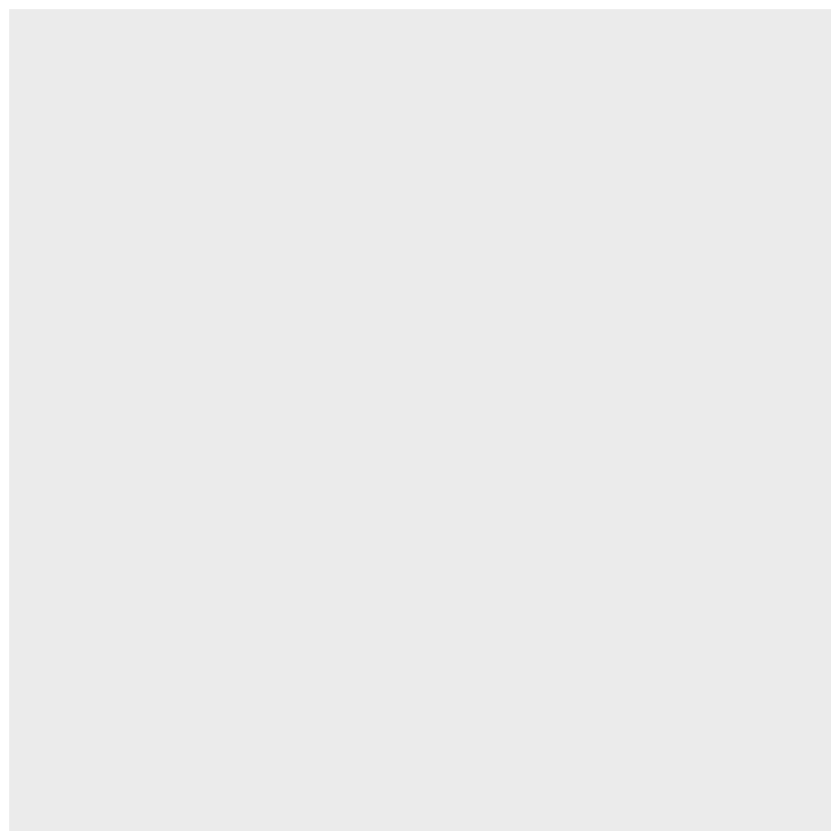

In [73]:
ggplot(d_exp)

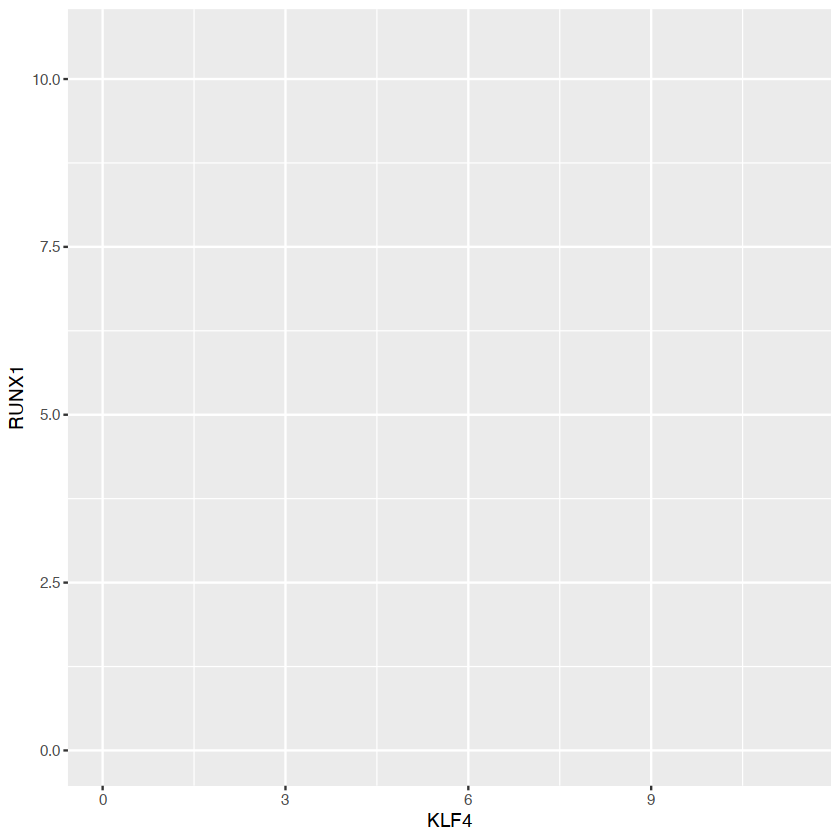

In [74]:
ggplot(d_exp, aes(x=KLF4, y=RUNX1))

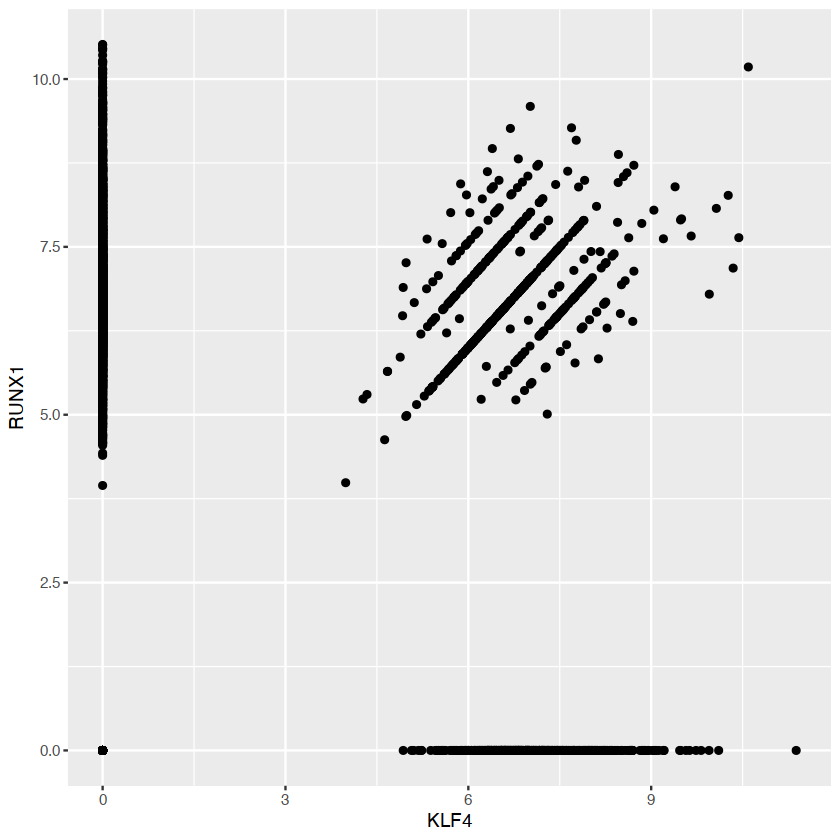

In [75]:
ggplot(d_exp, aes(x=KLF4, y=RUNX1)) + geom_point()

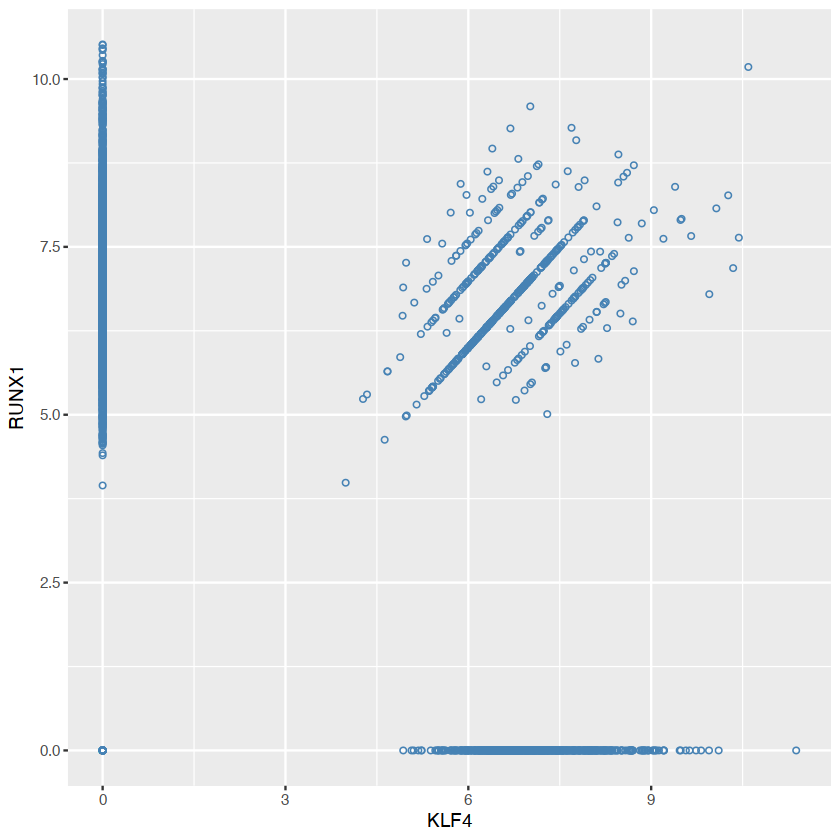

In [76]:
ggplot(d_exp, aes(x=KLF4, y=RUNX1)) + geom_point(size = 1.2, color = "steelblue", shape = 21)

It’s also possible to control points shape and color by a grouping variable (here, `Sample`). For example, in the code below, we map points `color` and `shape` to the datasets grouping variable.

Note that, a `ggplot` can be holded in a variable, say `p`, to be printed later

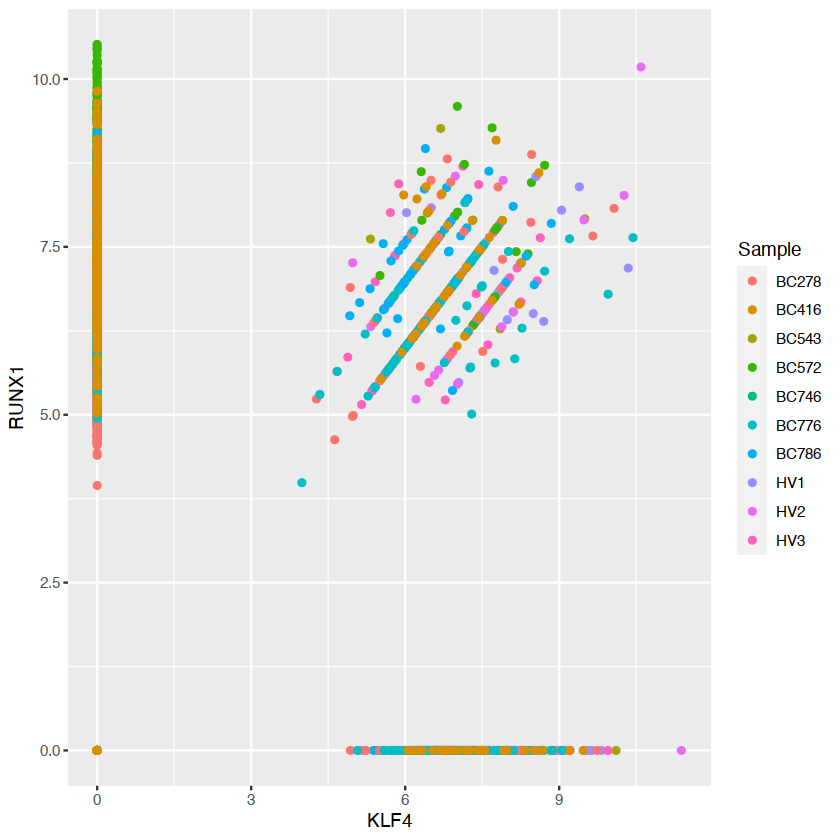

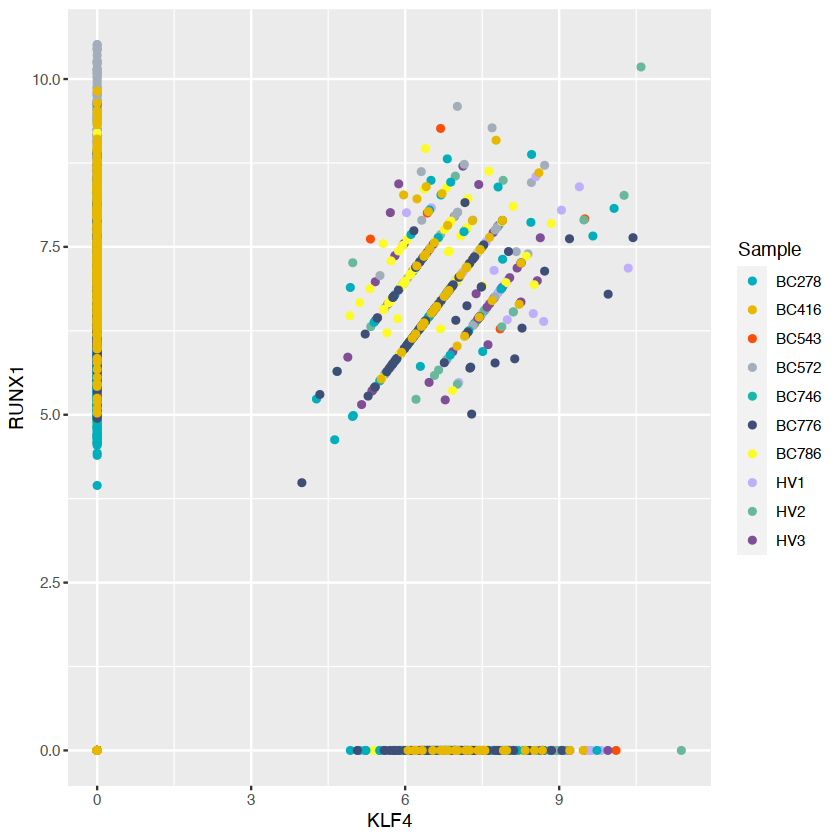

In [77]:
# Control points color by groups
ggplot(d_exp, aes(x=KLF4, y=RUNX1))+
  geom_point(aes(color = Sample))

# Change the default color manually.
# Use the scale_color_manual() function
p <- ggplot(d_exp, aes(x=KLF4, y=RUNX1))+
  geom_point(aes(color = Sample))+
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#A2AFBB", "#17B8AB", "#3F4E77", "#FCFA27", "#BFAFFB", "#69B89B", "#7F4E97"))
print(p)

## GGPlot theme

Note that, the default theme of ggplots is `theme_gray()` (or `theme_grey()`), which is theme with grey background and white grid lines. More themes are available for professional presentations or publications. These include: `theme_bw()`, `theme_classic()` and `theme_minimal()`.

To change the theme of a given ggplot (p), use this: `p + theme_classic()`. 

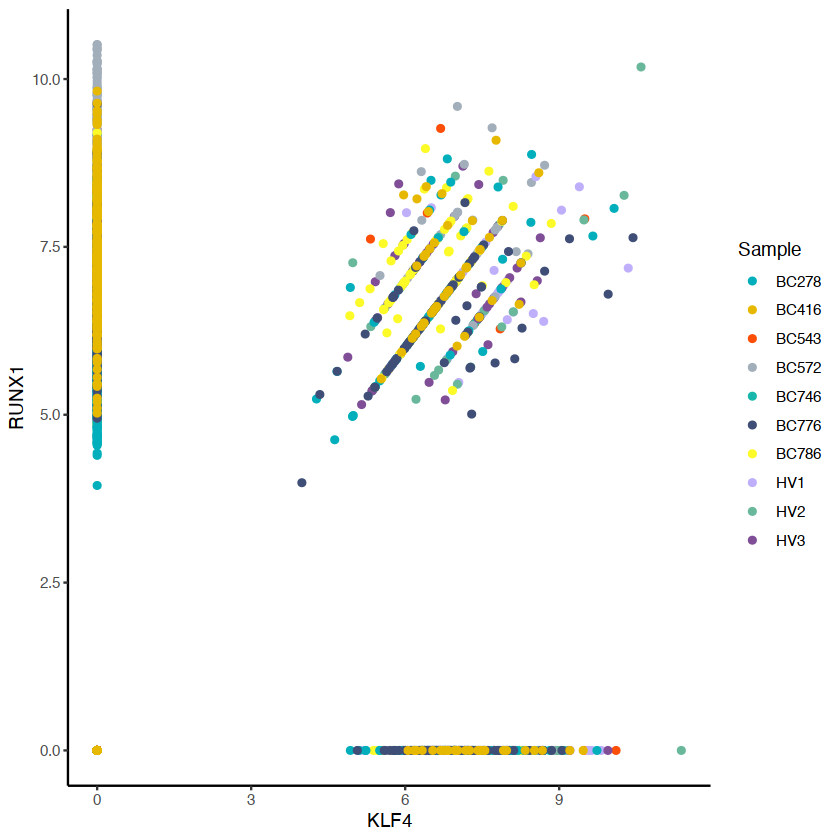

In [78]:
p <- ggplot(d_exp, aes(x=KLF4, y=RUNX1))+
  geom_point(aes(color = Sample))+
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#A2AFBB", "#17B8AB", "#3F4E77", "#FCFA27", "#BFAFFB", "#69B89B", "#7F4E97"))
p <- p + theme_classic()
print(p)


In [79]:
df <- reducedDim(sce)
head(df)

AAACCTGCACCGATAT-1,31.75737,41.45222
AAACGGGCACGACTCG-1,39.95130,44.24846
AAAGCAATCCTAAGTG-1,35.30692,40.31110
AAAGTAGGTGATGATA-1,37.10719,43.00212
AAAGTAGTCTCGCTTG-1,40.69935,44.52304
AACACGTGTTGGTAAA-1,38.65847,31.53103


## Adding layers to ggplot, Lines (Prediction Line)
A plot constructed with ggplot can have more than one geom. In that case the mappings established in the `ggplot()` call are plot defaults that can be added to or overridden. Our plot could use a regression line:

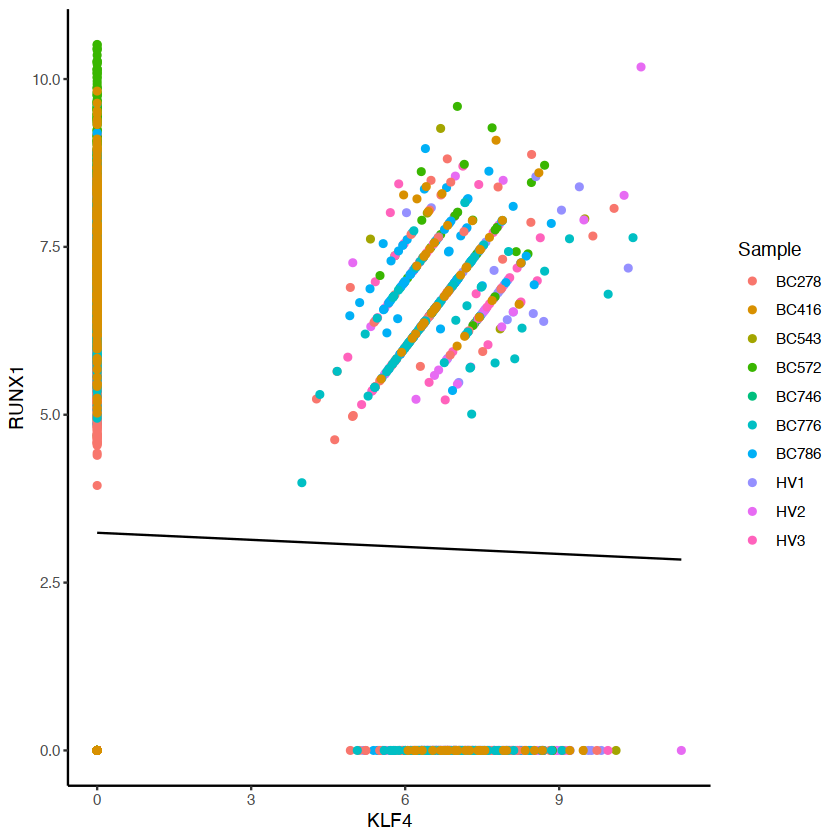

In [80]:
d_exp$pred.SC <- predict(lm(RUNX1 ~ KLF4, data = d_exp))

ggplot(d_exp, aes(x = KLF4, y = RUNX1)) + 
  geom_point(aes(color = Sample)) +
  geom_line(aes(y = pred.SC)) +
  theme_classic()

## `Title`, `xlab` & `ylab`

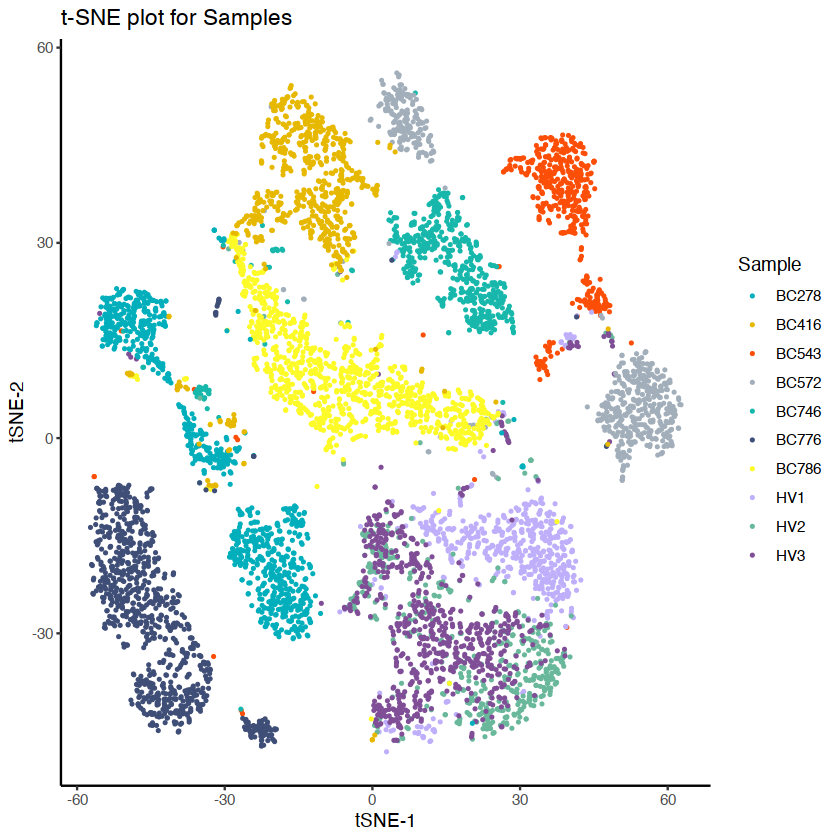

In [81]:
df <- as.data.frame(reducedDim(sce))
df$Sample <- colData(sce)$Sample
p <- ggplot(df, aes(x=V1, y=V2))+
  geom_point(size = 0.4, aes(color = Sample))+
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#A2AFBB", "#17B8AB", "#3F4E77", "#FCFA27", "#BFAFFB", "#69B89B", "#7F4E97")) + 
  ggtitle('t-SNE plot for Samples') + 
  xlab('tSNE-1') + 
  ylab('tSNE-2') + 
  theme_classic()

p

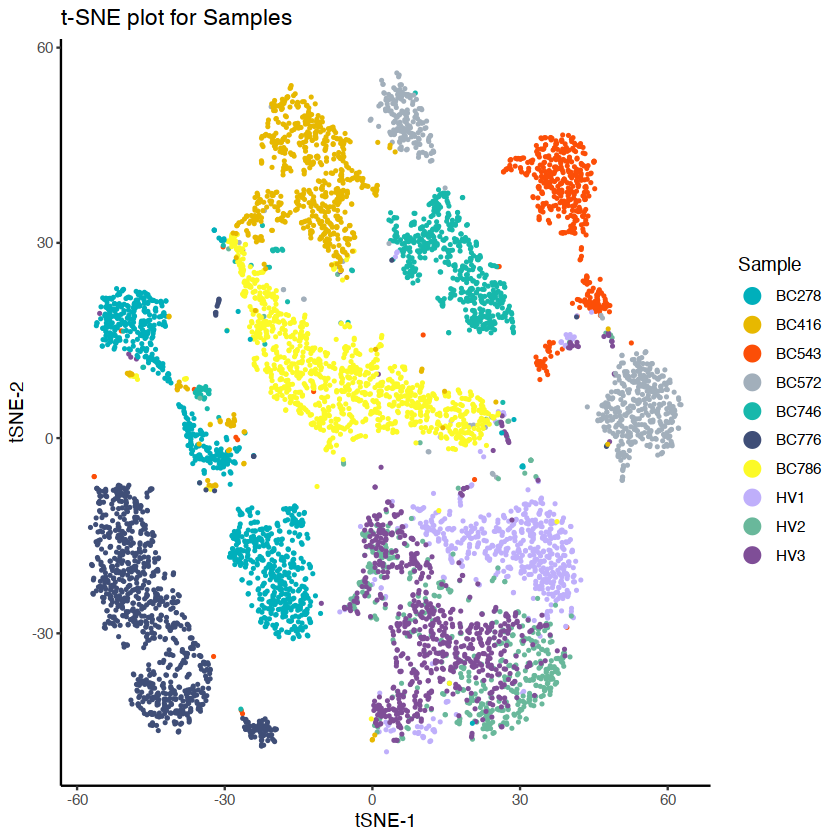

In [82]:
df <- as.data.frame(reducedDim(sce))
df$Sample <- colData(sce)$Sample
p <- ggplot(df, aes(x=V1, y=V2))+
  geom_point(size = 0.4, aes(color = Sample))+
  scale_color_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#A2AFBB", "#17B8AB", "#3F4E77", "#FCFA27", "#BFAFFB", "#69B89B", "#7F4E97")) + 
  ggtitle('t-SNE plot for Samples') + 
  xlab('tSNE-1') + 
  ylab('tSNE-2') + 
  theme_classic() + 
  guides(colour = guide_legend(override.aes = list(size=4)))

p

## Histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



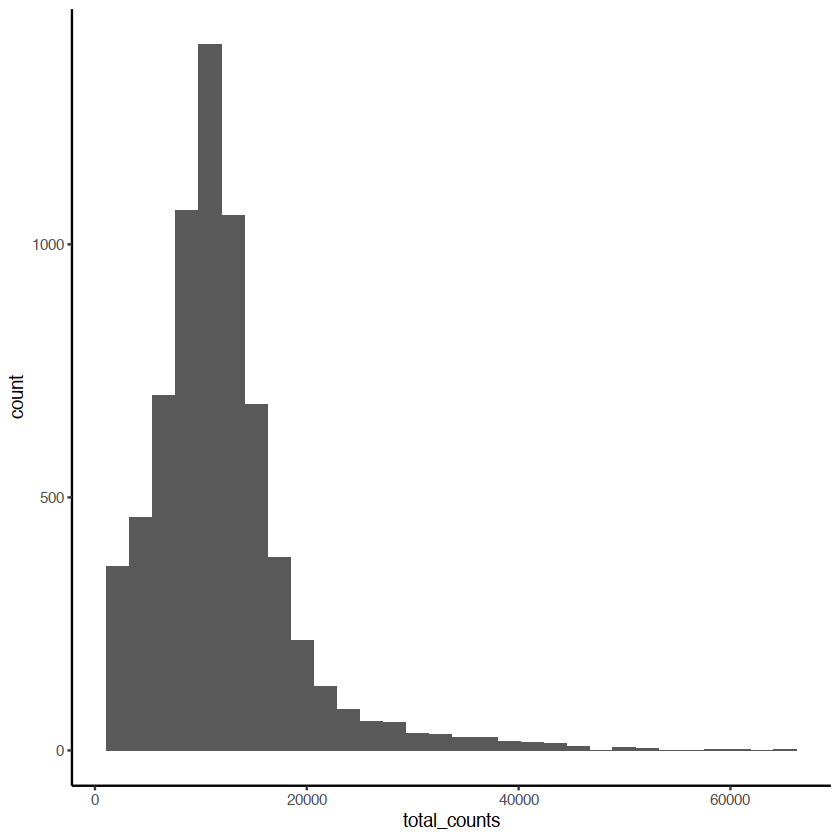

In [83]:
ggplot(d_exp, aes(x=total_counts)) + geom_histogram() + theme_classic() 

## Density plot

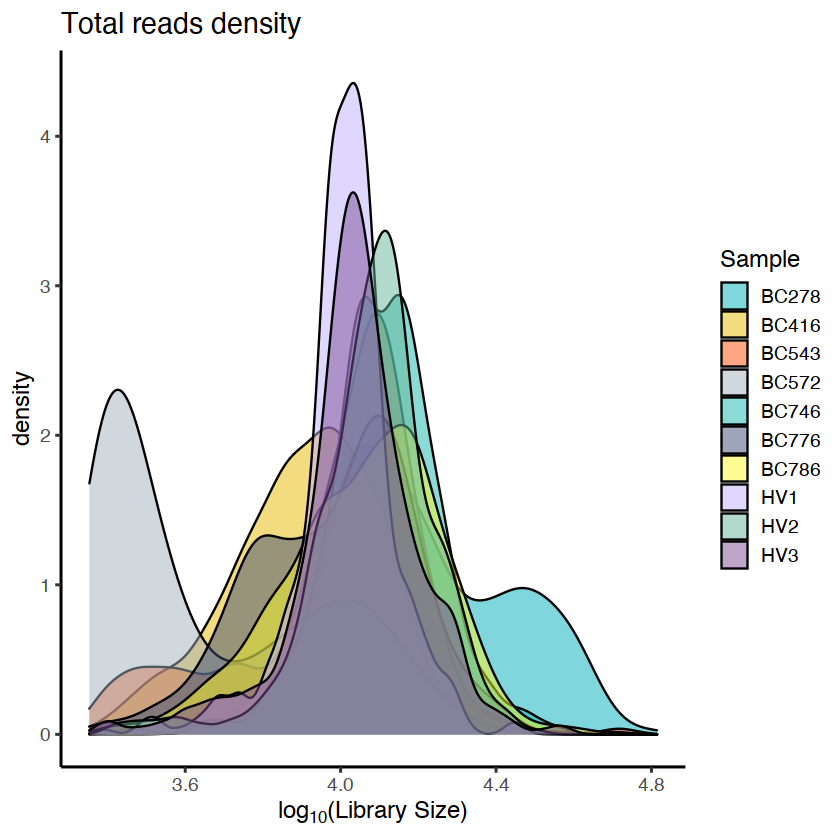

In [84]:
df <- data.frame(x=log10(sce$total_counts+1), Sample = sce$Sample)
ggplot(df,
       aes(x = x, fill = as.factor(Sample))) + 
       geom_density(alpha = 0.5) +
       labs(x = expression('log'[10]*'(Library Size)'), title = "Total reads density", fill = "Sample") + 
       theme_classic(base_size = 14) + # Setting the base size text for plots
       scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#A2AFBB", "#17B8AB", "#3F4E77", "#FCFA27", "#BFAFFB", "#69B89B", "#7F4E97")) # Need to set fill manual

## Facet

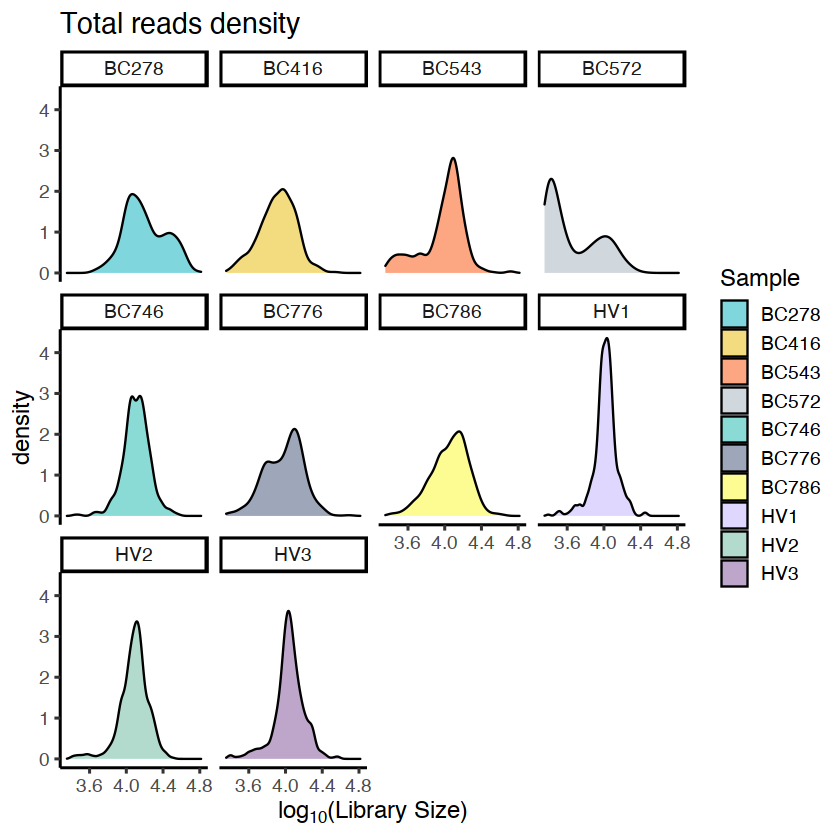

In [85]:
df <- data.frame(x=log10(sce$total_counts+1), Sample = sce$Sample)
ggplot(df,
       aes(x = x, fill = as.factor(Sample))) + 
       geom_density(alpha = 0.5) +
       labs(x = expression('log'[10]*'(Library Size)'), title = "Total reads density", fill = "Sample") + 
       theme_classic(base_size = 14) + # Setting the base size text for plots
       scale_fill_manual(values = c("#00AFBB", "#E7B800", "#FC4E07", "#A2AFBB", "#17B8AB", "#3F4E77", "#FCFA27", "#BFAFFB", "#69B89B", "#7F4E97")) +  # Need to set fill manual 
  facet_wrap(~Sample)

# Statistical Transformations
## Statistical Transformations
Some plot types (such as scatterplots) do not require transformations–each point is plotted at x and y coordinates equal to the original value. Other plots, such as boxplots, histograms, prediction lines etc. require statistical transformations:

- for a smoother the y values must be transformed into predicted values

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



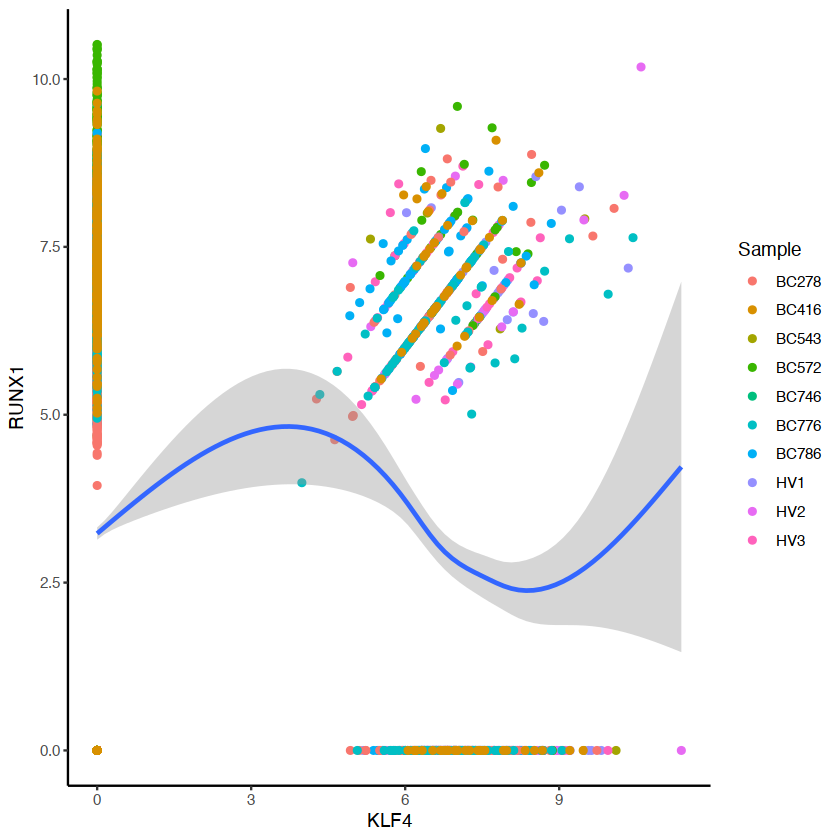

In [86]:
ggplot(d_exp, aes(x = KLF4, y = RUNX1)) + 
  geom_point(aes(color = Sample)) +
  geom_smooth() +
  theme_classic()

`geom_smooth()` using formula 'y ~ x'



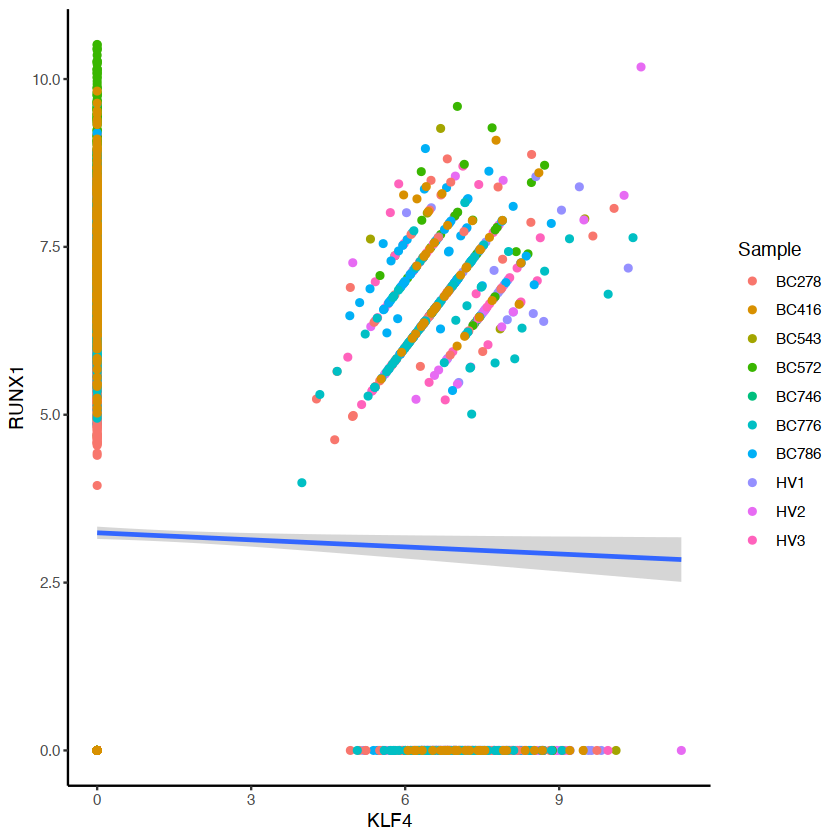

In [87]:
ggplot(d_exp, aes(x = KLF4, y = RUNX1)) + 
  geom_point(aes(color = Sample)) +
  geom_smooth(method = "lm") +
  theme_classic()

# Excercises
First let us look at the mpg dataset

In [88]:
mpg

manufacturer,model,displ,year,cyl,⋯,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,⋯,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,⋯,f,18,29,p,compact
audi,a4,1.8,1999,4,⋯,f,21,29,p,compact
audi,a4,2.0,2008,4,⋯,f,20,31,p,compact
audi,a4,2.0,2008,4,⋯,f,21,30,p,compact
audi,a4,2.8,1999,6,⋯,f,16,26,p,compact
⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮
volkswagen,passat,2.0,2008,4,⋯,f,19,28,p,midsize
volkswagen,passat,2.0,2008,4,⋯,f,21,29,p,midsize
volkswagen,passat,2.8,1999,6,⋯,f,16,26,p,midsize


## Excercise #1
1. How would you plot the relationship between `cty`, the average city mileage, and `hwy`, the average highway mileage? How would you describe this relationship?

<details><summary>Click here for answer</summary>

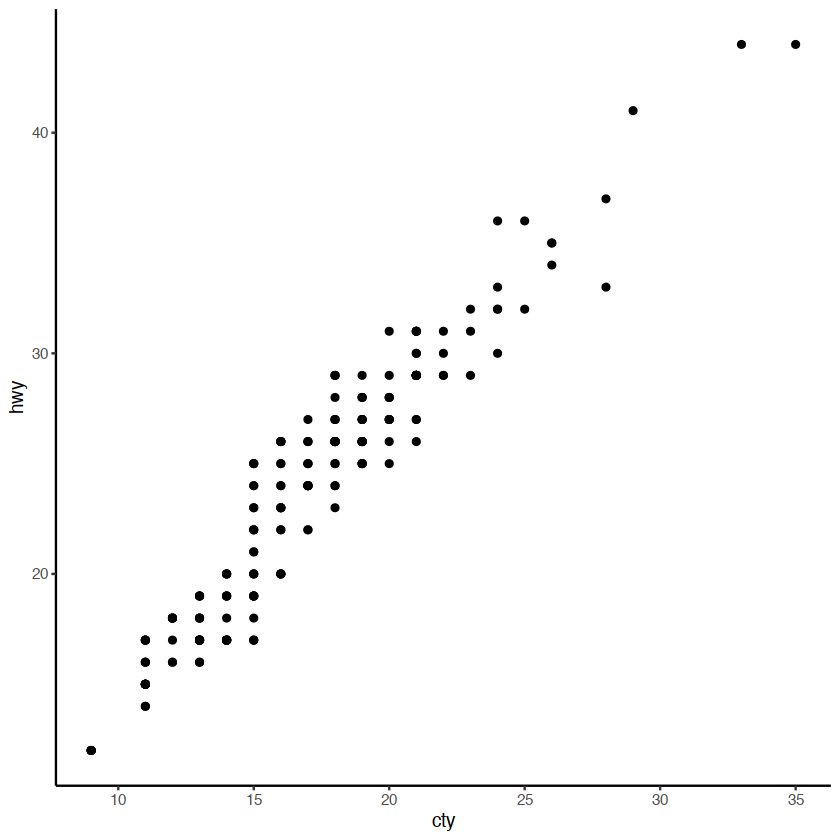

In [89]:
ggplot(mpg, aes(cty, hwy)) + 
  geom_point() +
  theme_classic()

</details>

<br>

2. How would you draw a smooth line? Also, how would you colour the transmissions differently?

<details><summary>Click here for answer</summary>

`geom_smooth()` using formula 'y ~ x'



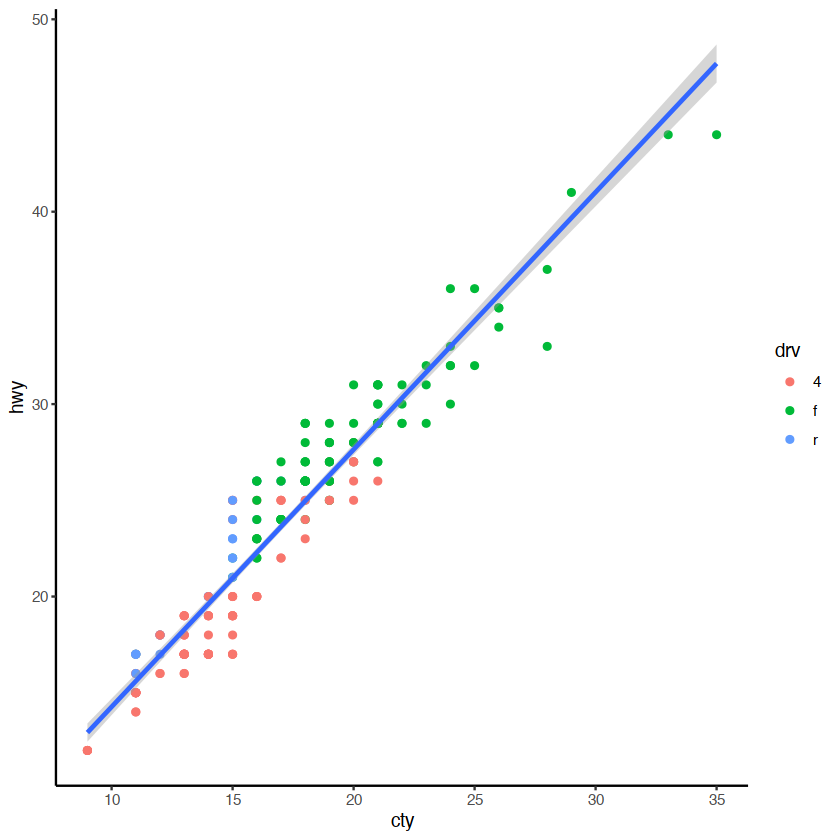

In [90]:
ggplot(mpg, aes(cty, hwy)) + 
  geom_point(aes(colour = drv)) +
  geom_smooth(method = "lm") +
  theme_classic()

</details>

## Excercise #2
Show the distribution of scores for `hwy`, highway miles per gallon

<details><summary>Click here for answer</summary>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



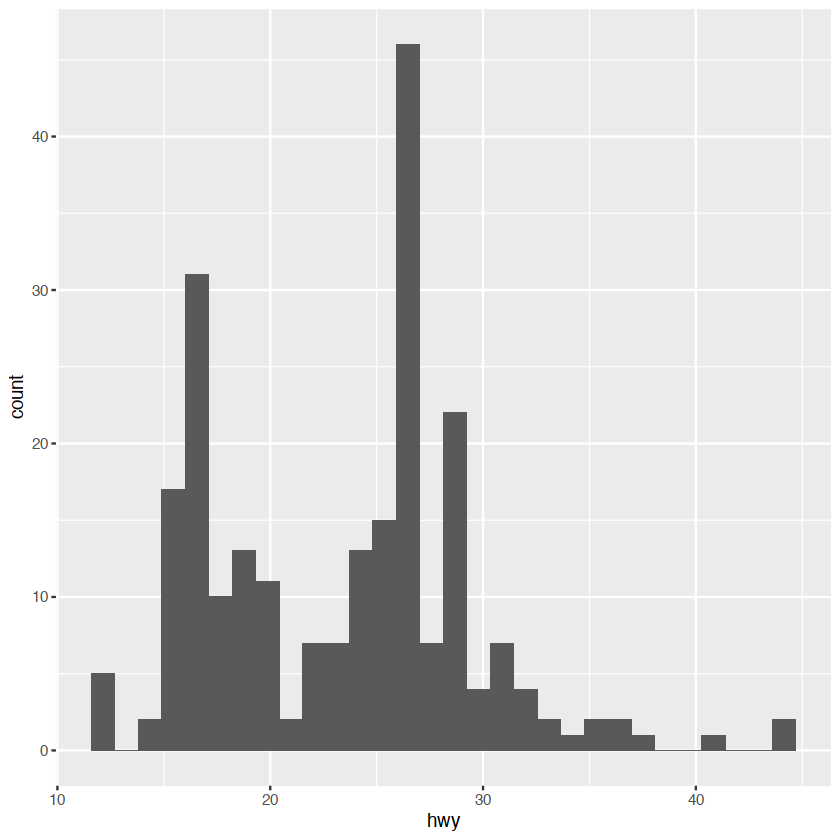

In [91]:
ggplot(mpg, aes(hwy)) + 
  geom_histogram()

</details>

## Excercise #3
Produce a similar plot as shown below

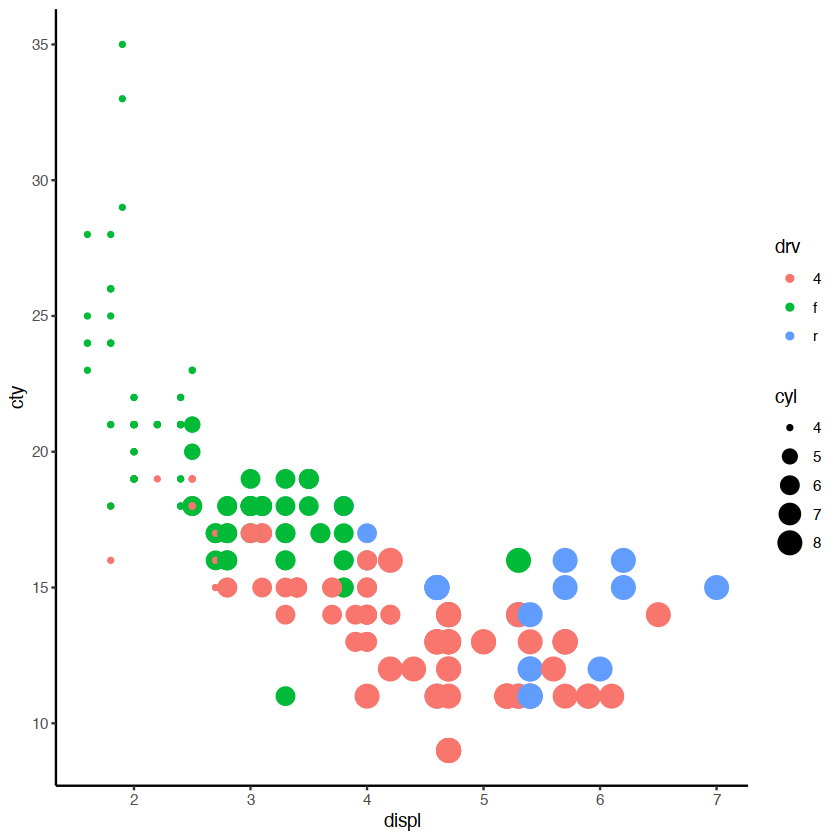

In [92]:
ggplot(mpg, aes(x=displ, y=cty, colour=drv, size=cyl)) +
  geom_point() + theme_classic()

<details><summary>Click here for answer</summary>

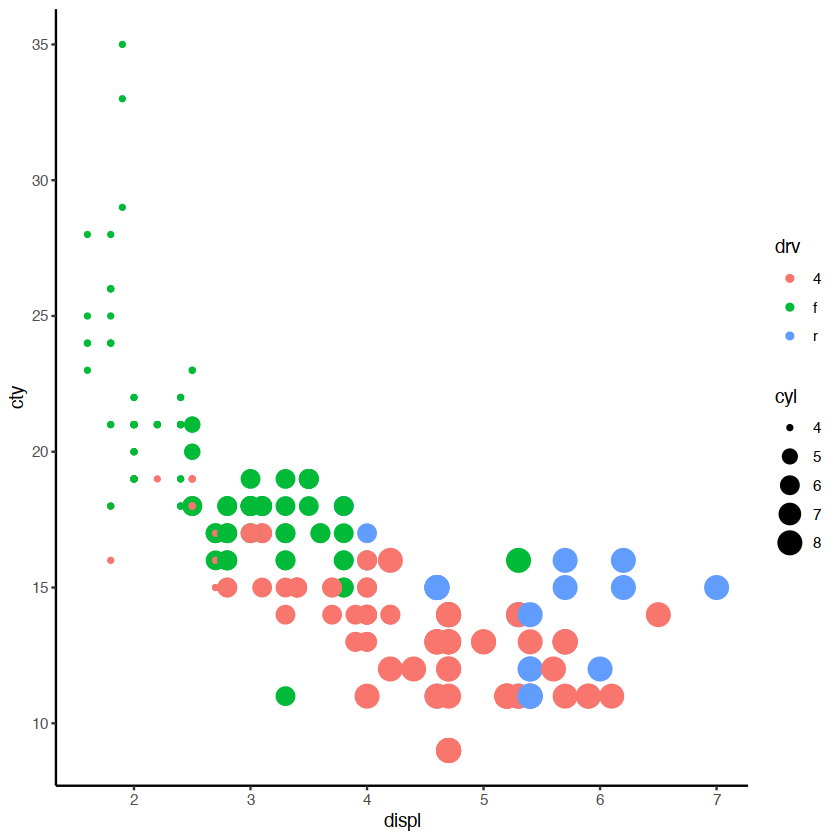

In [93]:
ggplot(mpg, aes(x=displ, y=cty, colour=drv, size=cyl)) +
  geom_point() + theme_classic()

</details>

